In [14]:
from bs4 import BeautifulSoup
from requests import get
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []


url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'


# Preparing the monitoring of the loop
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]
# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        response = get(url+ year_url + '&sort=num_votes,desc&page=' + page)

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

In [27]:

movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.head())


                                     movie    year  imdb  metascore   votes
0                                    Logan  (2017)   8.1         77  540173
1                             Wonder Woman  (2017)   7.5         76  468898
2                                  Dunkirk  (2017)   7.9         94  451614
3           Guardians of the Galaxy Vol. 2  (2017)   7.7         67  450457
4  Star Wars: Episode VIII - The Last Jedi  (2017)   7.2         85  447843


0                                      Logan
1                               Wonder Woman
2                                    Dunkirk
3             Guardians of the Galaxy Vol. 2
4    Star Wars: Episode VIII - The Last Jedi
Name: movie, dtype: object

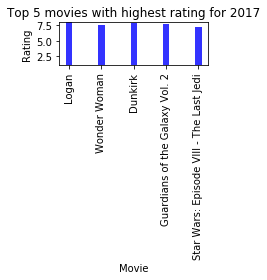

In [49]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
top5=movie_ratings.head()
bar_width = 0.2

opacity = 0.8
bar1= plt.bar( top5.movie,top5.imdb, bar_width,

                 alpha=opacity,

                 color='b'

                 )

plt.xlabel('Movie')
plt.xticks(rotation = 90)
plt.ylabel('Rating')
plt.ylim(1,8)

#plt.legend()

plt.title('Top 5 movies with highest rating for 2017')

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Metascore')

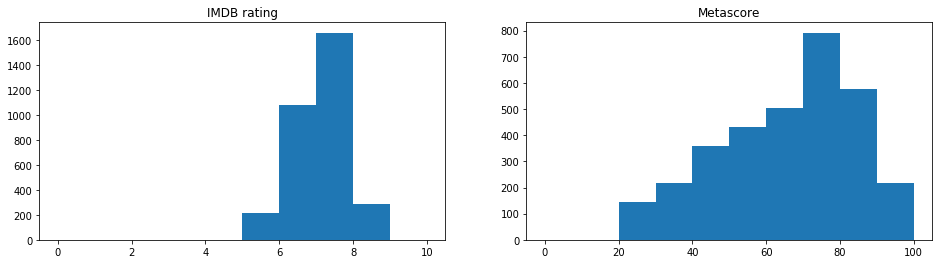

In [48]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
ax1, ax2 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')